<Axes: title={'center': 'Income vs Vehicle Age'}, xlabel='Income', ylabel='VehicleAge'>

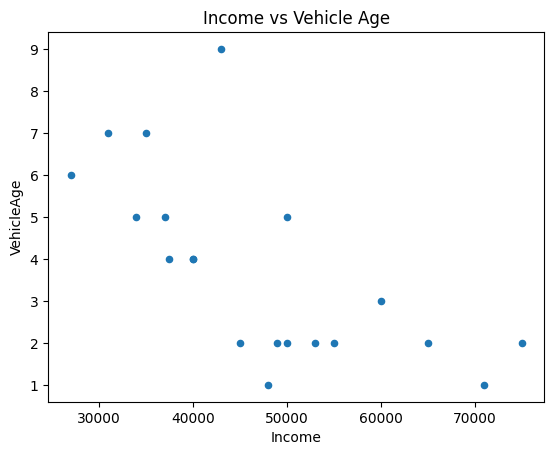

In [94]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
import statsmodels.api as sm
from scipy.stats import norm

# Define the dataset
data = {
    'Income': [45000, 40000, 60000, 50000, 55000, 37000, 31000, 40000, 75000, 43000,
               50000, 35000, 65000, 53000, 48000, 49000, 37500, 71000, 34000, 27000],
    'VehicleAge': [2, 4, 3, 2, 2, 5, 7, 4, 2, 9, 5, 7, 2, 2, 1, 2, 4, 1, 5, 6],
    'Purchased':  [0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0]
}
df = pd.DataFrame(data)
df.head()
df.plot(x='Income', y='VehicleAge', kind='scatter', title='Income vs Vehicle Age')

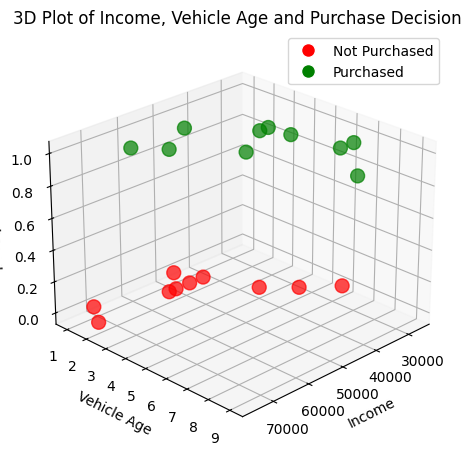

In [95]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

fig = plt.figure(figsize=(7, 4.7))
ax = fig.add_subplot(111, projection='3d')

colors = ['red' if p == 0 else 'green' for p in df['Purchased']]
scatter = ax.scatter(df['Income'], df['VehicleAge'], df['Purchased'], 
                     c=colors, s=100, alpha=0.7)

ax.set_xlabel('Income')
ax.set_ylabel('Vehicle Age')
ax.set_zlabel('Purchased')
ax.set_title('3D Plot of Income, Vehicle Age and Purchase Decision')

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Not Purchased', 
                   markerfacecolor='red', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Purchased', 
                   markerfacecolor='green', markersize=10)]
ax.legend(handles=legend_elements, loc='upper right')

ax.view_init(elev=25, azim=45)

plt.tight_layout()
plt.show()


### Fit Logistic Regression with scikit-learn

In [98]:
scaler= StandardScaler()
X = scaler.fit_transform(df[['Income', 'VehicleAge']])
#X= scaler.fit_transform(df)
y = df['Purchased']

#model = LogisticRegression()
model = LogisticRegression(penalty=None, solver='lbfgs')

model.fit(X,y)

print('Intercept:',model.intercept_[0])

for name, coef in zip (['Income','VehicleAge'],model.coef_[0]):
    print(f"Coefficient for {name}: {coef:.4f}")


Intercept: 0.14721612338827542
Coefficient for Income: 0.9412
Coefficient for VehicleAge: 2.1615


---

### Predict Probability (Income = 45000, VehicleAge = 5)

In [99]:
test_df = pd.DataFrame([[45000,5]], columns = ['Income', 'VehicleAge'])
test_input = scaler.transform(test_df) 
pred_prob = model.predict_proba(test_input)[0][1]
print(f"Predicted probability (Income=45000, VehicleAge=5): {pred_prob:.4f}")


Predicted probability (Income=45000, VehicleAge=5): 0.7710


---

### Adding interaction term 

In [82]:
# here creating an interaction term
df['Intercation'] = df['Income'] * df['VehicleAge']
X_int =df[['Income', 'VehicleAge', 'Intercation']]
X_int_scaled = scaler.fit_transform(X_int)

# now fitting the logistic regression model with the interaction term
model_int = LogisticRegression()
model_int.fit(X_int_scaled, y)

print('Intercept:',model_int.intercept_[0])

for name, coef in zip (['Income','VehicleAge','Intercation'],model_int.coef_[0]):
    print(f"Coefficient for {name}: {coef:.4f}")


Intercept: 0.11265372912423147
Coefficient for Income: 0.1453
Coefficient for VehicleAge: 0.3958
Coefficient for Intercation: 1.0870


### Testing the Significance of the interaction term

In [83]:
# we need tp add a constant intecept column to the data

X_sm = sm.add_constant(X_int_scaled)
model_sm = sm.Logit(y, X_sm)
result = model_sm.fit()
print(result.summary())
print("----------------------------------")
print("x1 = Income, x2 = VehicleAge, x3 = Interaction")

Optimization terminated successfully.
         Current function value: 0.413770
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                   20
Model:                          Logit   Df Residuals:                       16
Method:                           MLE   Df Model:                            3
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.4031
Time:                        21:38:01   Log-Likelihood:                -8.2754
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                   0.01082
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4743      0.675      0.702      0.482      -0.849       1.798
x1            -1.7991      1.

The p value of 0.107 for interaction term is greater than 0.05, so we 
can't reject the null hypothesis. This means that the interaction term is not significant in the model.

---

### Report model parameter statistics and Compute 95%confidence intervals on parameters.

#### not including interaction term because it is not significant.

In [88]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['Income', 'VehicleAge']])

x_const = sm.add_constant(X_scaled)
model = sm.Logit(df['Purchased'], x_const)
result = model.fit()
print(result.summary())
print("x1 = Income, x2 = VehicleAge")

Optimization terminated successfully.
         Current function value: 0.527038
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                   20
Model:                          Logit   Df Residuals:                       17
Method:                           MLE   Df Model:                            2
Date:                Sun, 20 Apr 2025   Pseudo R-squ.:                  0.2396
Time:                        21:41:16   Log-Likelihood:                -10.541
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                   0.03607
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1472      0.547      0.269      0.788      -0.924       1.219
x1             0.9412      0.

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


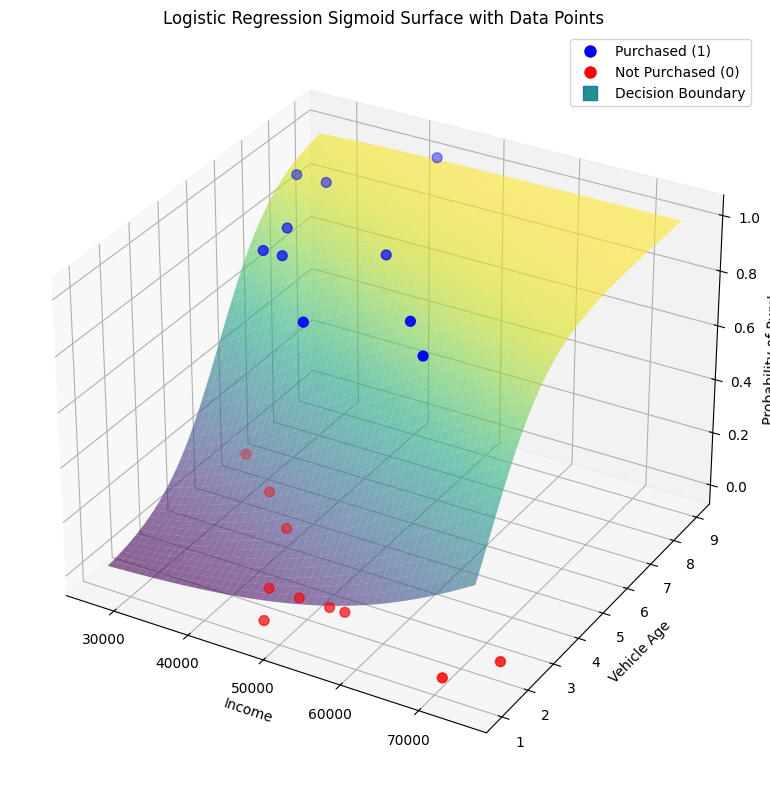

In [107]:
# used claude for the 3D logistic function visualization

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import matplotlib as mpl

# Get model coefficients
coef = result.params
intercept, beta_income, beta_vehicleage = coef

# Generate a grid of Income and VehicleAge values
income_range = np.linspace(df['Income'].min(), df['Income'].max(), 50)
vehicleage_range = np.linspace(df['VehicleAge'].min(), df['VehicleAge'].max(), 50)
income_grid, vehicleage_grid = np.meshgrid(income_range, vehicleage_range)

# Scale the grid using the same scaler
grid_scaled = scaler.transform(np.column_stack((income_grid.ravel(), vehicleage_grid.ravel())))
income_scaled = grid_scaled[:, 0].reshape(income_grid.shape)
vehicleage_scaled = grid_scaled[:, 1].reshape(vehicleage_grid.shape)

# Compute predicted probabilities over the grid
z = intercept + beta_income * income_scaled + beta_vehicleage * vehicleage_scaled
predicted_probs = 1 / (1 + np.exp(-z))

# Plotting the sigmoid surface and data points
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the sigmoid surface
surface = ax.plot_surface(income_grid, vehicleage_grid, predicted_probs, cmap='viridis', 
                         alpha=0.6, edgecolor='none')

# Plot actual data points
colors = ['red' if p == 0 else 'blue' for p in df['Purchased']]
ax.scatter(df['Income'], df['VehicleAge'], df['Purchased'], color=colors, s=50)

# Axis labels and title
ax.set_xlabel('Income')
ax.set_ylabel('Vehicle Age')
ax.set_zlabel('Probability of Purchase')
ax.set_title('Logistic Regression Sigmoid Surface with Data Points')

# Create custom legend elements
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Purchased (1)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Not Purchased (0)')
]

# Add a proxy artist for the surface to the legend
# Create a proxy artist for the colormap
cmap = plt.cm.viridis
norm = mpl.colors.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array for the scalar mappable

# Add the proxy artists
legend_elements.append(Line2D([0], [0], linestyle="none", marker='s', 
                             markersize=10, markerfacecolor='#21918c', 
                             label='Decision Boundary'))

# Add the legend
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

In [91]:
conf = result.conf_int()
conf.columns = ['2.5%', '97.5%']
print(conf)
print('\n')
print("x1 = Income, x2 = VehicleAge")


           2.5%     97.5%
const -0.924157  1.218557
x1    -0.651045  2.533514
x2    -0.100075  4.423134


x1 = Income, x2 = VehicleAge


In [ ]:
# same as above but formatted
interval= {
    "Variable": ["Intercept", "Income (x1)", "VehicleAge (x2)"],
    "Coefficient (β)": [0.1472, 0.9412, 2.1615],
    "95% Confidence Interval (CI)": ["[-0.924, 1.219]", "[-0.651, 2.534]", "[-0.100, 4.423]"]
}

df = pd.DataFrame(interval)
print(df)


          Variable  Coefficient (β) 95% Confidence Interval (CI)
0        Intercept           0.1472              [-0.924, 1.219]
1      Income (x1)           0.9412              [-0.651, 2.534]
2  VehicleAge (x2)           2.1615              [-0.100, 4.423]


---

# Report

# Logistic Regression Report on Vehicle Purchase Data

## 1. Model Fitting and Deviance Assessment

A logistic regression model was fit to predict the probability of vehicle purchase based on `Income` and `VehicleAge`.

- **Log-Likelihood (Full Model):** -10.541  
- **Log-Likelihood (Null Model):** -13.863  
- **Pseudo R-squared:** 0.2396  
- **Model Deviance (−2 * LL):** 21.082  
- **LLR p-value:** 0.03607

> **Interpretation:** The model deviance is lower than the null model's deviance, and the LLR p-value < 0.05 indicates that the overall model is statistically significant.

---

## 2. Coefficient Interpretation

| Variable       | Coefficient (β) | 95% Confidence Interval (CI) | p-value |
|----------------|------------------|-------------------------------|---------|
| Intercept      | 0.1472           | [-0.924, 1.219]               | 0.788   |
| Income (x1)    | 0.9412           | [-0.651, 2.534]               | 0.247   |
| VehicleAge (x2)| 2.1615           | [-0.100, 4.423]               | 0.061   |

> - **β1 (Income):** A one-unit increase in income (scaled) is associated with increased log-odds of purchasing a vehicle, though the effect is not statistically significant (p = 0.247).
> - **β2 (VehicleAge):** Older vehicles slightly increase the likelihood of purchase, with a near-significant p-value of 0.061.

---

## 3. Probability Estimation

**Predicted probability for:**  
- **Income = $45,000**  
- **VehicleAge = 5**

**Predicted probability of purchase:** **0.7710**

---

## 4. Interaction Term and Significance

An interaction term between `Income` and `VehicleAge` was added and tested in an extended model.

- **Interaction Coefficient p-value:** 0.107

### Null and Alternative Hypotheses

- **Null Hypothesis (H₀):** The interaction term between `Income` and `VehicleAge` has no effect on the probability of vehicle purchase.
- **Alternative Hypothesis (H₁):** The interaction term between `Income` and `VehicleAge` has a significant effect on the probability of vehicle purchase.

Since the p-value > 0.05, we fail to reject the null hypothesis. The interaction effect is **not statistically significant** and hence not included in the final model.

---

## 5. Final Model Parameter Statistics (Without Interaction)

| Variable       | Coefficient (β) | Std. Error | z-score | p-value | 95% CI              |
|----------------|------------------|-------------|---------|---------|----------------------|
| Intercept      | 0.1472           | 0.547       | 0.269   | 0.788   | [-0.924, 1.219]      |
| Income (x1)    | 0.9412           | 0.812       | 1.159   | 0.247   | [-0.651, 2.534]      |
| VehicleAge (x2)| 2.1615           | 1.154       | 1.873   | 0.061   | [-0.100, 4.423]      |

---

## Conclusion

- The model fits significantly better than a null model.
- `VehicleAge` is a borderline significant predictor.
- The interaction between `Income` and `VehicleAge` does not significantly improve the model and is excluded.
- A customer with $45,000 income and a 5-year-old vehicle has a **~77.10%** chance of purchasing.

- Since the p-values for all the coefficients (Intercept: 0.788, Income: 0.247, and VehicleAge: 0.061) are greater than 0.05, we fail to reject the null hypothesis for each.
- This indicates that none of the coefficients are statistically significant, and they do not have a strong effect on vehicle purchase probability.


---